In [1]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
Some hidden code... to show/hide this cell's raw code input, click (or double click if stubborn!) <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################
from IPython.core.display import HTML
def css_styling():
    styles = open("./STUFF/colors.css", "r").read()
    return HTML(styles)
css_styling()

# CH273: Key Skills 1
## The Ergodic Principle: a Pythonic Tale

In this session, we are going to play around with the ergodic principle, a key concept in statistical mechanics. To this end, we will use some computational tools, most notably...

### Jupyter notebooks

<img src="./STUFF/jn_logo.png" width="300">

**This!** is actually a Jupyter notebook! It allows you to:

- Write down some text
- Write computer programs using a number of languages: we are going to use Python
- Visualize the outcome of your calculations
- Take advantage of powerful computational tools

All of this in one place! First things first...

<div class=warn>
These blue boxes contain instructions for you to follow, or stuff for you to do
<h2>How to access this Jupyter notebook</h2>

* <b>Step 1</b>: Open a web browser, go to [this page](https://warwick.ac.uk/fac/sci/chemistry/research/maurer/maurergroup/software/iatl_strategic_project/), scroll down, download the Login App (the Windows exacutable if using ITS machines) and double click on the executable (usually ended up into the Download folder) <br>
* <b>Step 2</b>: The Notebook Launcher pops up: select the CH273 module and fill in the boxes using your SCRTP username and password <br>
* <b>Step 3</b>: Open the Jupyter notebook you are interested in, e.g. KS_1_Class.ipynb <br>
* <b>Step 4</b>: Make a copy of the orginal notebook (which is read only). In the toolbar on top of the notebook: File - Make a Copy <br>
* <b>Step 5</b>: You're all set! <br><br>
<b> Remember: </b> You can access this notebook at home at any time by going through the same steps on e.g. your laptop - all the changes you have made will be saved and synced! At the moment, though, you'll have to tunnel through the campus network via VPN (see [here](https://warwick.ac.uk/services/its/servicessupport/networkservices/vpn/))<br>
<div/>

## Right... but what - is - a Jupyter notebook exactly?
A Jupyter notebook is a collection of "cells" - blocks within which we can e.g. write down an equation or plot a function. We will use "Markdown cells" to write down text and equations, and "Code cells" to do everything else. Cells can be inserted (and copied, and pasted, and cut!) via the toolbar above. Once we are happy with the content of a given cell, we have to "Run" it - to execute it, by holding the shift key and hitting the enter/return key. The Jupyter notebook will take care of running the cell, and let us know if everything is ok. You can also run a cell, or indeed all the cells in a notebook, via the same toolbar above. Let's have a look at Markdown and Code cells, then...

### This is a Markdown cell
Thus, we can write into it! To edit the cell, a double click of the mouse should do.
We can play around with **bold text**, *italic text*, 
# Big Headings, 
## Small Headings, 
### Tiny Headings,
and much more. Importantly, we can also write down equations using LaTeX syntax. This one should hopefully look quite familiar:

$$
A_{\text{Macroscopic}}=\langle a_{\text{Microscopic}} \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N}a_i
$$

Remember, LaTeX may look daunting at the beginning, but it is the best documented markup language in the world, and after a little while it becomes natural. In fact, journal articles and books are ultimately *all* typesetted in LaTeX!

In [2]:
string = "This is a Code cell"
print(string) 

This is a Code cell


### Wait, what happened?
In the cell above, we actually used some Python already! We did two things:

- 1. We have stored some text (**This is a code cell**) into a *variable* we have called **string**
- 2. We have printed the variable **string**

## P is for Python!
What's Python anyway? It's a programming language - one of many, such as C++ or Fortran. It is especially popular these days, mostly because there exist a phenomenal amount of Python libraries (or packages, or modules...) out there that can be harnessed for free. These can in turn be used to do all sort of interesting things, from machine learning for drug design to stock market analysis. This is the reason why a decent knowledge of Python is now often indicated as a desirable (transferable!) skill when interviewing for jobs in Pharma companies and finance alike.
<img src="./STUFF/python_logo.png" width="300">

### One cool thing about Python...
In python you can sum (concatenate...) strings as if they were numbers!

In [3]:
string_1 = "Winter"
string_2 = " is"
string_3 = " Coming!"
string_123 = string_1+string_2+string_3
print(string_123)

Winter is Coming!


Great - now that we know everything about Python, Jupyter Notebooks, Markdown and Code cells, we have what we need to make a start...

# The Ergodic Principle

In the previous lecture we have seen that in order to estimate the value of a certain macroscopic quantity, such as the temperature $\mathcal{T}$ of a system, we can calculate an *ensemble average* of the temperature of several (the more the better!) microscopic configuration of the same system. Assuming we are working in a microcanonical ensemble $NVE$ with $N$ microscopic configurations (each one characterised by a certain temperature $T_i$), we have:

$$
\mathcal{T}=\langle T \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N} T_i
$$

However, we have also seen that the outcome of molecular dynamics simulations (one of the most common computational tools to explore the phase space!) consist in a *trajectory* - that is, a collection of configurations of *the same* microscopic configuration propagated in time. But then, what do we do with it? Luckily, if we assume that we have run our simulation long enough for that particular configuration to have explored the whole of the phase space accessible to the system, then we can apply the so-called **ergodic principle**:

$$
\mathcal{T}=\langle T \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N} T_i = \lim_{t\to\infty}\int_0^t T_i \ dt'
$$

That is, if the system has explored in time the entire phase space, then *we can take a time average instead of an ensemble average*. Note that the time average in the equation above is expressed in the form of an integral. In molecular dynamics, though, time is not continuous - it is discrete, in that we evolve the system in time via subsequent *timesteps* $\Delta t$, i.e. small time windows. In addition, at a certain point (after $N_{\Delta t}$ timesteps) a molecular dynamics run will have to stop, so that we cannot explore the phase space indefinitely. Thus, we write:

$$
\mathcal{T}=\langle T \rangle_{\text{NVE}}=\frac{1}{N}\sum_{i=1}^{N} T_i = \frac{1}{N_{\Delta t}\cdot\Delta t}\sum_{j=1}^{N_{\Delta t}} T(\Delta t_j)
$$

Is this actually true? We are about to find out!

### Ensemble average
We start by looking at the temperature of ten different microscopic configurations of the same systems (a box containing 2000 water molecules). Just ten? Yes, because in order to generate them, I had to run ten different, *statistically independent* molecular dynamics simulations. Now, these temperatures are stored in a file, "temperature_ensemble.dat" which contains two columns: the first column is just an index (1, 2... 10), the second one contains the temperatures we are interested in. Time to code...
<img src="./STUFF/ten_c.jpeg" width="800">

In [4]:
# This is a comment - the # tells Python to just ignore whatever follows

# First things first, we are going to "take advantage of powerful computational tools"
# Specifically, we are going to "import" the numpy library - an incredibly useful set of of Pythonic tools
# that will save us a lot of time when dealing with numbers. off we go...

import numpy as np # All set! We can now use numpy, and because we are lazy, each time we use it 
                   # we are going to call it via "np" as opposed to "numpy

# We store the name of the file we want to read (temperature_ensemble.dat) into a variable (file_name_ensemble):
file_name_ensemble = "./STUFF/temperature_ensemble.dat"


# We use the "loadtxt" tool provided by numpy (which we have called by "np.loadtxt") to read 
# the whole content of the file into the variable t_ensemble
t_ensemble = np.loadtxt(file_name_ensemble)


# Let's have a look at the "t_ensemble" variable:
print(t_ensemble)

[[  1.   295.23]
 [  2.   302.42]
 [  3.   302.61]
 [  4.   289.72]
 [  5.   303.2 ]
 [  6.   301.55]
 [  7.   302.1 ]
 [  8.   292.39]
 [  9.   295.12]
 [ 10.   297.61]]


In [5]:
# What did we do? Well, it turns out the "t_ensemble" variable is actually a two-dimensional array!
# No need to panic, though. We can actually select just the first column of it:
print(t_ensemble[:,0])

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [6]:
# Wait, what? Well, in order to access a certain element of an array, we use the following syntax:
# name_of_the_array[index of the row, index of the column]

# In the example above, ":" means "use the whole column", while "0" actually stands for the first column
# Why? Because in Python the numbering of array elements starts from zero, not from one!
# For example, in order to access the third element of the second column of "t_ensemble"...
print(t_ensemble[2,1])

302.61


In [7]:
# Great! In order to compute the temperature as an ensemble average from these data, then, we just sum the elements 
# in the second column of "t_ensemble", and then divide the result by ten. This is one way to do it:
ensemble_average=np.sum(t_ensemble[:,1])/len(t_ensemble[:,1])
print(ensemble_average)

# We have used the "sum" tool of numpy (which we have called by "np.sum") to sum all the elements in
# the second column of "t_ensemble". We have also divided by ten, i.e. the length of "t_ensemble" which
# we have extracted via the "len" command. 

298.19500000000005


<div class=warn>
Calculate the standard deviation of the <span style="font-family: courier">t_ensemble</span> array using numpy. 
Dont' know where to start? Google it!
<div/>

In [8]:
np.std(t_ensemble[:,1])

4.61530768205111

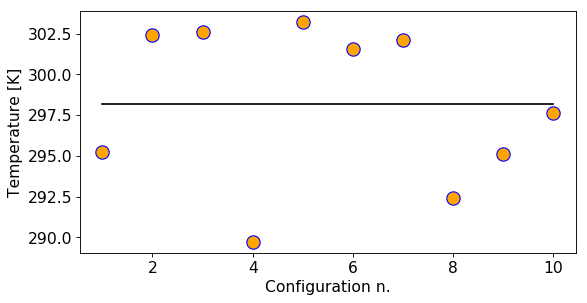

In [9]:
# Now, can we have a look at the data - and at the ensemble average we have just calculated, please?
# Of course we can! We start by importing another very useful set of tools: matplotlib,
# which can plot basically everything you want in whatever fashion you like!

# The following two lines have to do with formatting figures nicely...
%matplotlib notebook 
%matplotlib inline 
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
plt.plot((1, 10), (ensemble_average, ensemble_average), 'k-') # Draw a line indicating the ensemble average

# Plot the temperature
plt.plot(t_ensemble[:,0], t_ensemble[:,1], 'o', markerfacecolor='orange', markersize=12, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Configuration n.',fontsize=14)
plt.ylabel('Temperature [K]',fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Show the final result
plt.show()

### Time average
Now, we shall compute the *time* average of the temperature along a molecular dynamics trajectory (containing 250 frames, each one separated by 4 ps):

Note that the system is exactly the same as above (a box containing 2000 water molecules), but in this case we are going to look at how exactly the temperature changes in time - as opposed to taking an ensemble average.

In [10]:
from IPython.display import HTML
HTML('<iframe src="https://player.vimeo.com/video/293032511?title=0&byline=0&portrait=0" width="700" height="394" frameborder="0" webkitallowfullscreen mozallowfullscreen allowfullscreen></iframe><p><a href="https://vimeo.com/293032511"> </p>')


<div class=warn>
Calculate the difference between $\langle T \rangle_{ensemble}$ and $\langle T \rangle_{time}$. <br>
* Load the data (time and temperature, ps and K, respectively) from the <span style="font-family: courier">temperature_MD.dat</span> file into a numpy array. <br>
* Calculate the time average of the temperature <br>
* Plot the temperature as a function of time (label the axis!) <br>
* Calculate || $\langle T \rangle_{ensemble} - \langle T \rangle_{time}$ ||
<div/>

In [11]:
# Load the data 
file_name_time = "./STUFF/temperature_MD.dat"
t_time = np.loadtxt(file_name_time)
#print(t_time)

In [12]:
# Calculate the time average of the temperature 
time_average=np.sum(t_time[:,1])/len(t_time[:,1])
print(time_average)

299.8967474223108


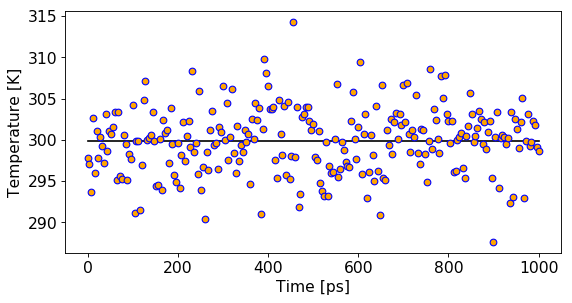

In [13]:
# Plot the temperature as a function of time
plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
plt.plot((0, 1000), (time_average, time_average), 'k-') # Draw a line indicating the ensemble average

# Plot the temperature
plt.plot(t_time[:,0], t_time[:,1], 'o', markerfacecolor='orange', markersize=6, markeredgecolor='blue', 
         linewidth=2.5)

# Labeling of x and y axes
plt.xlabel('Time [ps]',fontsize=14)
plt.ylabel('Temperature [K]',fontsize=14)

plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)

# Show the final result
plt.show()

In [14]:
#Calculate || $\langle T \rangle_{ensemble} - \langle T \rangle_{time}$ ||
abs(ensemble_average-time_average) # [K]

1.7017474223107456

<div class=warn>
<b>Here be dragons...</b><br>
* Create a histogram of the temperature values contained in the <span style="font-family: courier">temperature_MD.dat</span> file <br>
* Normalize said histogram to obtain a probability density function
<div/>

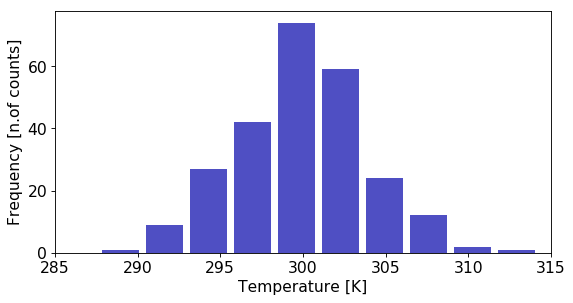

In [15]:
# Create a histogram of the temperature values contained in the temperature_MD.dat file 
plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
hist, bin_edges = np.histogram(t_time[:,1])
n, bins, patches = plt.hist(x=t_time[:,1], bins=bin_edges, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.ylabel('Frequency [n.of counts]',fontsize=14);
plt.xlabel('Temperature [K]',fontsize=14);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlim([285,315])
plt.show()

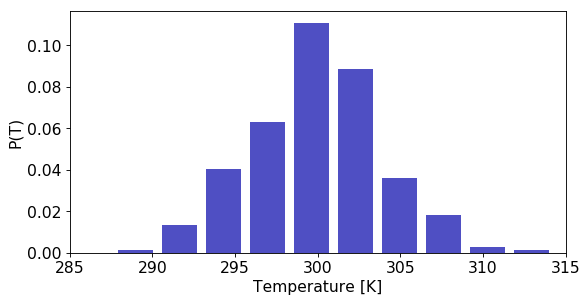

In [16]:
# Normalize said histogram to obtain a probability density function

# Find the total area
bin_width = bin_edges[1]-bin_edges[0]
n_bins = len(hist)
tot_area = 0
for i in range(n_bins):
    tot_area = tot_area + (bin_width*hist[i])  
    
# Normalize the histogram / total area
pdens = np.zeros(n_bins)
for i in range(n_bins):
    pdens[i] = hist[i]/tot_area
    
b_plot=(bin_edges[:-1])+(bin_width/2)

plt.figure(figsize=(8, 4), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
plt.bar(b_plot, pdens, bin_width*0.8, color='#0504aa',alpha=0.7)

plt.ylabel('P(T)',fontsize=14);
plt.xlabel('Temperature [K]',fontsize=14);
plt.tick_params(axis='both', which='major', labelsize=14)
plt.tick_params(axis='both', which='minor', labelsize=14)
plt.xlim([285,315])
plt.show()

### In a nutshell...
<img src="./STUFF/ave.jpeg" width="600">